# **Data Preprocessing**

In [1]:
# Installation of Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project10/IMDB_Movies_Dataset.csv')

df.head(2)

,Unnamed: 0,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime
0,0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes
1,1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,NaN,"$3,513,659",2 hours 25 minutes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4989 non-null   int64  
 1   Title              4989 non-null   object 
 2   Average Rating     4989 non-null   float64
 3   Director           4989 non-null   object 
 4   Writer             4988 non-null   object 
 5   Metascore          3055 non-null   float64
 6   Cast               4982 non-null   object 
 7   Release Date       4989 non-null   object 
 8   Country of Origin  4986 non-null   object 
 9   Languages          4968 non-null   object 
 10  Budget             2651 non-null   object 
 11  Worldwide Gross    3895 non-null   object 
 12  Runtime            4989 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 506.8+ KB


**Deleting unnecessary columns**

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head(1)

,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes


In [6]:
df.isnull().sum()

,0
Title,0
Average Rating,0
Director,0
Writer,1
Metascore,1934
Cast,7
Release Date,0
Country of Origin,3
Languages,21
Budget,2338


**Removing rows that have null values**

In [7]:

df = df.dropna(subset=['Writer', "Cast", "Country of Origin", "Languages"])

df.isnull().sum()

,0
Title,0
Average Rating,0
Director,0
Writer,0
Metascore,1915
Cast,0
Release Date,0
Country of Origin,0
Languages,0
Budget,2317


**Filling Null values**

In [8]:
null_value_columns = df.columns[df.isnull().sum() >= 1]

for i in null_value_columns:
  if df[i].dtype == 'object' or 'category':
    df[i] = df[i].fillna(df[i].mode()[0])
  else:
    df[i] = df[i].fillna(df[i].mean())

df.isnull().sum()

<ipython-input-8-154c78cb4ffc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].fillna(df[i].mode()[0])


,0
Title,0
Average Rating,0
Director,0
Writer,0
Metascore,0
Cast,0
Release Date,0
Country of Origin,0
Languages,0
Budget,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4962 entries, 0 to 4988
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              4962 non-null   object 
 1   Average Rating     4962 non-null   float64
 2   Director           4962 non-null   object 
 3   Writer             4962 non-null   object 
 4   Metascore          4962 non-null   float64
 5   Cast               4962 non-null   object 
 6   Release Date       4962 non-null   object 
 7   Country of Origin  4962 non-null   object 
 8   Languages          4962 non-null   object 
 9   Budget             4962 non-null   object 
 10  Worldwide Gross    4962 non-null   object 
 11  Runtime            4962 non-null   object 
dtypes: float64(2), object(10)
memory usage: 504.0+ KB


**Changing Data types form Object to float**

In [10]:
df['Runtime']

,Runtime
0,2 hours 22 minutes
1,2 hours 25 minutes
2,2 hours 55 minutes
3,1 hour 25 minutes
4,2 hours 15 minutes
...,...
4984,1 hour 50 minutes
4985,1 hour 9 minutes
4986,2 hours 13 minutes
4987,1 hour 30 minutes


In [11]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

categorical_columns

Index(['Title', 'Director', 'Writer', 'Cast', 'Release Date',
       'Country of Origin', 'Languages', 'Budget', 'Worldwide Gross',
       'Runtime'],
      dtype='object')

In [12]:
problem_columns = ['Budget', 'Worldwide Gross', 'Runtime']


In [13]:
def clean_numeric_column(column):
  if column.dtype != 'object':
    column = column.astype(str)
  return column.str.replace(r'[^\d.]','',regex=True).astype(float)


for col in problem_columns:
    if col in df.columns:
        df[col]=clean_numeric_column(df[col])
print(df.dtypes)

Title                 object
Average Rating       float64
Director              object
Writer                object
Metascore            float64
Cast                  object
Release Date          object
Country of Origin     object
Languages             object
Budget               float64
Worldwide Gross      float64
Runtime              float64
dtype: object


In [14]:
df[problem_columns]

,Budget,Worldwide Gross,Runtime
0,25000000.0,29332133.0,222.0
1,15000000.0,3513659.0,225.0
2,6000000.0,250342198.0,255.0
3,15000000.0,509.0,125.0
4,15000000.0,509.0,215.0
...,...,...,...
4984,4000000.0,290754.0,150.0
4985,15000000.0,509.0,19.0
4986,15000000.0,29893636.0,213.0
4987,7000000.0,17871370.0,130.0


**Changing Data type form object to datatime -> int**

In [15]:
df['Release Date']

,Release Date
0,"October 14, 1994 (India)"
1,"November 8, 2024 (Japan)"
2,1978 (India)
3,"April 1, 1975 (Turkey)"
4,"September 25, 2001 (India)"
...,...
4984,"September 29, 2000 (Spain)"
4985,"March 16, 1945 (United States)"
4986,"April 11, 2009 (Japan)"
4987,"April 24, 2013 (France)"


In [16]:
df[['Released Date', 'Released Country']] = df['Release Date'].str.extract(r'^(.*?)(?:\s*\((.*?)\))?$')


In [17]:
def convert_date(value):
    try:
        # Try full date format (YYYY-MM-DD or "Month Day, Year" like "October 15, 1999")
        return pd.to_datetime(value, errors='raise')
    except:
        try:
            # If only year (YYYY), convert to YYYY-01-01
            return pd.to_datetime(value + '-01-01', format='%Y-%m-%d', errors='raise')
        except:
            try:
                # If year and month (YYYY-MM), convert to YYYY-MM-01
                return pd.to_datetime(value + '-01', format='%Y-%m-%d', errors='raise')
            except:
                # If all fails, return NaT (Not a Time)
                return pd.NaT


df['Released Date'] = df['Released Date'].apply(convert_date)


In [18]:
df[['Released Date', 'Released Country', 'Release Date']]


,Released Date,Released Country,Release Date
0,1994-10-14,India,"October 14, 1994 (India)"
1,2024-11-08,Japan,"November 8, 2024 (Japan)"
2,1978-01-01,India,1978 (India)
3,1975-04-01,Turkey,"April 1, 1975 (Turkey)"
4,2001-09-25,India,"September 25, 2001 (India)"
...,...,...,...
4984,2000-09-29,Spain,"September 29, 2000 (Spain)"
4985,1945-03-16,United States,"March 16, 1945 (United States)"
4986,2009-04-11,Japan,"April 11, 2009 (Japan)"
4987,2013-04-24,France,"April 24, 2013 (France)"


In [19]:
df.drop('Release Date', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4962 entries, 0 to 4988
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              4962 non-null   object        
 1   Average Rating     4962 non-null   float64       
 2   Director           4962 non-null   object        
 3   Writer             4962 non-null   object        
 4   Metascore          4962 non-null   float64       
 5   Cast               4962 non-null   object        
 6   Country of Origin  4962 non-null   object        
 7   Languages          4962 non-null   object        
 8   Budget             4962 non-null   float64       
 9   Worldwide Gross    4962 non-null   float64       
 10  Runtime            4962 non-null   float64       
 11  Released Date      4962 non-null   datetime64[ns]
 12  Released Country   4962 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 542.7+ KB


In [20]:

df['Released year'] = df['Released Date'].dt.year
df['Released month'] = df['Released Date'].dt.month
df['Released day'] = df['Released Date'].dt.day

df.drop('Released Date', axis=1, inplace=True)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4962 entries, 0 to 4988
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              4962 non-null   object 
 1   Average Rating     4962 non-null   float64
 2   Director           4962 non-null   object 
 3   Writer             4962 non-null   object 
 4   Metascore          4962 non-null   float64
 5   Cast               4962 non-null   object 
 6   Country of Origin  4962 non-null   object 
 7   Languages          4962 non-null   object 
 8   Budget             4962 non-null   float64
 9   Worldwide Gross    4962 non-null   float64
 10  Runtime            4962 non-null   float64
 11  Released Country   4962 non-null   object 
 12  Released year      4962 non-null   int32  
 13  Released month     4962 non-null   int32  
 14  Released day       4962 non-null   int32  
dtypes: float64(5), int32(3), object(7)
memory usage: 562.1+ KB


**bold text**

In [22]:
categorical_columns=df.select_dtypes(include=['object', 'category']).columns

categorical_columns

Index(['Title', 'Director', 'Writer', 'Cast', 'Country of Origin', 'Languages',
       'Released Country'],
      dtype='object')

In [23]:
df.drop(['Title', 'Released Country'], axis=1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4962 entries, 0 to 4988
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Average Rating     4962 non-null   float64
 1   Director           4962 non-null   object 
 2   Writer             4962 non-null   object 
 3   Metascore          4962 non-null   float64
 4   Cast               4962 non-null   object 
 5   Country of Origin  4962 non-null   object 
 6   Languages          4962 non-null   object 
 7   Budget             4962 non-null   float64
 8   Worldwide Gross    4962 non-null   float64
 9   Runtime            4962 non-null   float64
 10  Released year      4962 non-null   int32  
 11  Released month     4962 non-null   int32  
 12  Released day       4962 non-null   int32  
dtypes: float64(5), int32(3), object(5)
memory usage: 484.6+ KB


In [25]:
# Frequency Encoding
for col in ['Director', 'Writer', 'Cast']:
    df[col + '_freq'] = df[col].map(df[col].value_counts())


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4962 entries, 0 to 4988
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Average Rating     4962 non-null   float64
 1   Director           4962 non-null   object 
 2   Writer             4962 non-null   object 
 3   Metascore          4962 non-null   float64
 4   Cast               4962 non-null   object 
 5   Country of Origin  4962 non-null   object 
 6   Languages          4962 non-null   object 
 7   Budget             4962 non-null   float64
 8   Worldwide Gross    4962 non-null   float64
 9   Runtime            4962 non-null   float64
 10  Released year      4962 non-null   int32  
 11  Released month     4962 non-null   int32  
 12  Released day       4962 non-null   int32  
 13  Director_freq      4962 non-null   int64  
 14  Writer_freq        4962 non-null   int64  
 15  Cast_freq          4962 non-null   int64  
dtypes: float64(5), int32(3), int6

In [27]:
df.drop(['Director','Writer','Cast'], axis=1, inplace=True)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4962 entries, 0 to 4988
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Average Rating     4962 non-null   float64
 1   Metascore          4962 non-null   float64
 2   Country of Origin  4962 non-null   object 
 3   Languages          4962 non-null   object 
 4   Budget             4962 non-null   float64
 5   Worldwide Gross    4962 non-null   float64
 6   Runtime            4962 non-null   float64
 7   Released year      4962 non-null   int32  
 8   Released month     4962 non-null   int32  
 9   Released day       4962 non-null   int32  
 10  Director_freq      4962 non-null   int64  
 11  Writer_freq        4962 non-null   int64  
 12  Cast_freq          4962 non-null   int64  
dtypes: float64(5), int32(3), int64(3), object(2)
memory usage: 484.6+ KB


In [29]:
print("Unique values in 'Country of Origin':", df['Country of Origin'].nunique())
print("Unique values in 'Languages':", df['Languages'].nunique())


Unique values in 'Country of Origin': 809
Unique values in 'Languages': 1084


In [30]:
# Target Encoding for Country of Origin
country_mean = df.groupby('Country of Origin')['Worldwide Gross'].mean()
df['Country_Encoded'] = df['Country of Origin'].map(country_mean)

# Target Encoding for Languages
language_mean = df.groupby('Languages')['Worldwide Gross'].mean()
df['Language_Encoded'] = df['Languages'].map(language_mean)

# View results
print(df[['Country of Origin', 'Languages', 'Country_Encoded', 'Language_Encoded']])


     Country of Origin                    Languages  Country_Encoded  \
0        United States                      English     7.122105e+07   
1                Japan                     Japanese     2.056020e+07   
2        United States      English, Italian, Latin     7.122105e+07   
3               Turkey                      Turkish     3.704489e+06   
4         India, Japan                      English     5.090000e+02   
...                ...                          ...              ...   
4984             Spain                      Spanish     1.354326e+07   
4985     United States                      English     7.122105e+07   
4986             Japan                     Japanese     2.056020e+07   
4987            France  French, Portuguese, English     6.028382e+06   
4988       South Korea                       Korean     3.337807e+07   

      Language_Encoded  
0         6.764808e+07  
1         2.821636e+07  
2         1.654935e+08  
3         3.019020e+06  
4         

In [31]:
df.drop(['Country of Origin','Languages'], axis=1, inplace=True)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4962 entries, 0 to 4988
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Average Rating    4962 non-null   float64
 1   Metascore         4962 non-null   float64
 2   Budget            4962 non-null   float64
 3   Worldwide Gross   4962 non-null   float64
 4   Runtime           4962 non-null   float64
 5   Released year     4962 non-null   int32  
 6   Released month    4962 non-null   int32  
 7   Released day      4962 non-null   int32  
 8   Director_freq     4962 non-null   int64  
 9   Writer_freq       4962 non-null   int64  
 10  Cast_freq         4962 non-null   int64  
 11  Country_Encoded   4962 non-null   float64
 12  Language_Encoded  4962 non-null   float64
dtypes: float64(7), int32(3), int64(3)
memory usage: 484.6 KB


# **Data spliting**

In [33]:
X = df.drop(columns=['Worldwide Gross'])
y = df['Worldwide Gross']

In [34]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# **Standart comparing**

Liner Regression

In [40]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred_lr=lr.predict(X_test)


In [66]:
mse_lr=mean_squared_error(y_test,y_pred_lr)
r2_lr=r2_score(y_test,y_pred_lr)

cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=5)

print("Liner Regression mse:", mse_lr)
print("Liner Regression r2:", r2_lr)

print("Liner Regression Mean Cross-validation scores: ", cv_scores_lr.mean())

Liner Regression mse: 1.813563592059456e+16
Liner Regression r2: 0.37362210801787177
Liner Regression Mean Cross-validation scores:  0.4687912427487181


Decision Tree

In [45]:
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [46]:
y_pred_dt=dt.predict(X_test)


In [67]:
mse_dt=mean_squared_error(y_test,y_pred_dt)
r2_dt=r2_score(y_test,y_pred_dt)

print("Decision Tree mse:", mse_dt)
print("Decision Tree r2:", r2_dt)

cv_scores_dt = cross_val_score(dt, X_train, y_train, cv=5)
print("Decision Tree Mean Cross-validation scores: ", cv_scores_dt.mean())

Decision Tree mse: 8102227982693012.0
Decision Tree r2: 0.7201610957355677
Decision Tree Mean Cross-validation scores:  0.39650696979596844


Random Forest

In [48]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [49]:
y_pred_rf=rf.predict(X_test)


In [69]:
mse_rf=mean_squared_error(y_test,y_pred_rf)
r2_rf=r2_score(y_test,y_pred_rf)

print("Random Forest mse:", mse_rf)
print("Random Forest r2:", r2_rf)

cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5)
print("Random Forest Mean Cross-validation scores: ", cv_scores_rf.mean())

Random Forest mse: 8102227982693012.0
Random Forest r2: 0.7201610957355677
Random Forest Mean Cross-validation scores:  0.6465884848276403


KNN

In [52]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [53]:
y_pred_knn = knn.predict(X_test)


In [84]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


print("KNN mse:", mse_knn)
print("KNN r2:", r2_knn)

cv_scores_knn = cross_val_score(knn, X_train, y_train, cv=5)
print("KNN Mean Cross-validation scores: ", cv_scores_knn.mean())

KNN mse: 8102227982693012.0
KNN r2: 0.7201610957355677
KNN Mean Cross-validation scores:  0.6286166785200282


# **Comparing after scaling**

In [58]:
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

Liner Regression

In [59]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)



LinearRegression()

In [60]:
y_pred_lr=lr.predict(X_test_scaled)
mse_lr=mean_squared_error(y_test,y_pred_lr)
r2_lr=r2_score(y_test,y_pred_lr)


print("Liner Regression mse:", mse_lr)
print("Liner Regression r2:", r2_lr)

cv_scores_lr = cross_val_score(lr, X_train_scaled, y_train, cv=5)
print("Liner Regression Mean Cross-validation scores: ", cv_scores_lr.mean())


Liner Regression mse: 1.773485839687577e+16
Liner Regression r2: 0.3874643676199031
Liner Regression Mean Cross-validation scores:  -9.005028530266294


Decision Tree

In [61]:
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled,y_train)



DecisionTreeRegressor(random_state=42)

In [62]:
y_pred_dt=dt.predict(X_test_scaled)
mse_dt=mean_squared_error(y_test,y_pred_dt)
r2_dt=r2_score(y_test,y_pred_dt)

print("Decision Tree mse:", mse_dt)
print("Decision Tree r2:", r2_dt)

cv_scores_dt = cross_val_score(dt, X_train_scaled, y_train, cv=5)
print("Decision Tree Mean Cross-validation scores: ", cv_scores_dt.mean())

Decision Tree mse: 1196436099425346.0
Decision Tree r2: 0.9586768765578086
Decision Tree Mean Cross-validation scores:  0.9186963798644887


Random Forest

In [63]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled,y_train)



RandomForestRegressor(random_state=42)

In [64]:

y_pred_rf=rf.predict(X_test_scaled)
mse_rf=mean_squared_error(y_test,y_pred_rf)
r2_rf=r2_score(y_test,y_pred_rf)

print("Random Forest mse:", mse_rf)
print("Random Forest r2:", r2_rf)

cv_scores_rf = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print("Random Forest Mean Cross-validation scores: ", cv_scores_rf.mean())

Random Forest mse: 625090045396144.2
Random Forest r2: 0.9784103195140998
Random Forest Mean Cross-validation scores:  0.9292824624252038


KNN

In [65]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [66]:
y_pred_knn=knn.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


print("KNN mse:", mse_knn)
print("KNN r2:", r2_knn)

cv_scores_knn = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print("KNN Mean Cross-validation scores: ", cv_scores_knn.mean())

KNN mse: 1.6864292639948872e+16
KNN r2: 0.41753241409168174
KNN Mean Cross-validation scores:  0.5062358582818225


# Comparing After Feature engineering


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4962 entries, 0 to 4988
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Average Rating    4962 non-null   float64
 1   Metascore         4962 non-null   float64
 2   Budget            4962 non-null   float64
 3   Worldwide Gross   4962 non-null   float64
 4   Runtime           4962 non-null   float64
 5   Released year     4962 non-null   int32  
 6   Released month    4962 non-null   int32  
 7   Released day      4962 non-null   int32  
 8   Director_freq     4962 non-null   int64  
 9   Writer_freq       4962 non-null   int64  
 10  Cast_freq         4962 non-null   int64  
 11  Country_Encoded   4962 non-null   float64
 12  Language_Encoded  4962 non-null   float64
dtypes: float64(7), int32(3), int64(3)
memory usage: 484.6 KB


In [48]:
df.columns

Index(['Average Rating', 'Metascore', 'Budget', 'Worldwide Gross', 'Runtime',
       'Released year', 'Released month', 'Released day', 'Director_freq',
       'Writer_freq', 'Cast_freq', 'Country_Encoded', 'Language_Encoded'],
      dtype='object')

In [49]:
df['Movie Age'] = 2024 - df['Released year']
df['Return on Investment'] = (df['Worldwide Gross'] - df['Budget']) / df['Budget']
df['Budget per Minute'] = df['Budget'] / df['Runtime']
df['Gross per Minute'] = df['Worldwide Gross'] / df['Runtime']
df['Director Popularity'] = df['Director_freq'] / df['Director_freq'].max()
df['Writer Popularity'] = df['Writer_freq'] / df['Writer_freq'].max()

In [50]:
X = df.drop(columns=['Worldwide Gross'])
y = df['Worldwide Gross']

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4962 entries, 0 to 4988
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Rating        4962 non-null   float64
 1   Metascore             4962 non-null   float64
 2   Budget                4962 non-null   float64
 3   Runtime               4962 non-null   float64
 4   Released year         4962 non-null   int32  
 5   Released month        4962 non-null   int32  
 6   Released day          4962 non-null   int32  
 7   Director_freq         4962 non-null   int64  
 8   Writer_freq           4962 non-null   int64  
 9   Cast_freq             4962 non-null   int64  
 10  Country_Encoded       4962 non-null   float64
 11  Language_Encoded      4962 non-null   float64
 12  Movie Age             4962 non-null   int32  
 13  Return on Investment  4962 non-null   float64
 14  Budget per Minute     4962 non-null   float64
 15  Gross per Minute      4962

In [52]:
mi_scores = mutual_info_regression(X, y)

mi_scores_df = pd.DataFrame(mi_scores, index=X.columns, columns=['MI Score'])
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

print(mi_scores_df)

                      MI Score
Gross per Minute      2.436304
Language_Encoded      0.779676
Return on Investment  0.765833
Country_Encoded       0.655282
Released year         0.223365
Movie Age             0.222208
Budget                0.212466
Budget per Minute     0.138996
Metascore             0.105318
Director Popularity   0.082609
Director_freq         0.077875
Runtime               0.043047
Writer Popularity     0.029043
Writer_freq           0.026519
Released month        0.022359
Average Rating        0.008056
Released day          0.006999
Cast_freq             0.003373


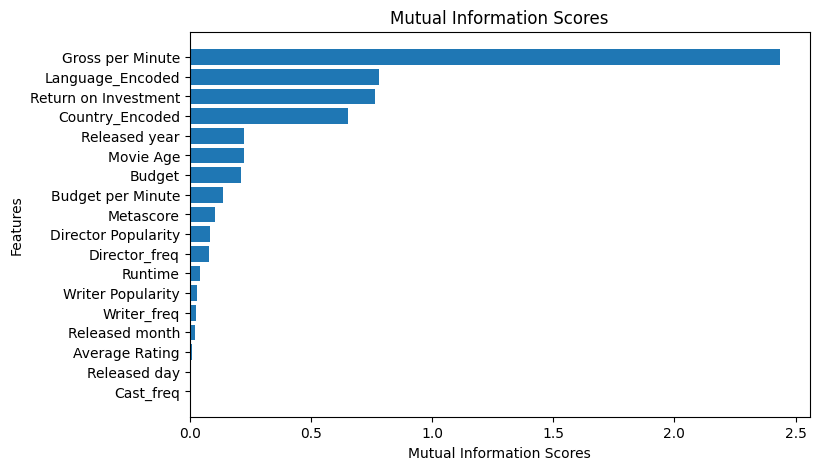

In [53]:
def plot_mi_scores(scores):
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)

  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title("Mutual Information Scores")
  plt.xlabel("Mutual Information Scores")
  plt.ylabel("Features")
  plt.show()


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores_df["MI Score"])

In [54]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [55]:
X_train.head()

,Average Rating,Metascore,Budget,Runtime,Released year,Released month,Released day,Director_freq,Writer_freq,Cast_freq,Country_Encoded,Language_Encoded,Movie Age,Return on Investment,Budget per Minute,Gross per Minute,Director Popularity,Writer Popularity
4713,7.2,60.0,15000000.0,148.0,1996,11,1,2,1,1,1.017005e+08,6.764808e+07,28,-0.827399,101351.351351,1.749332e+04,0.083333,0.058824
3201,7.4,82.0,15000000.0,138.0,2023,5,4,1,1,1,1.114084e+08,5.705402e+06,1,-0.619640,108695.652174,4.134349e+04,0.041667,0.058824
1667,7.7,88.0,1600000.0,153.0,1974,4,12,7,1,1,7.122105e+07,6.764808e+07,50,2.036414,10457.516340,3.175335e+04,0.291667,0.058824
3760,7.3,53.0,15000000.0,150.0,2021,1,29,2,1,1,7.122105e+07,6.764808e+07,3,-0.999966,100000.000000,3.393333e+00,0.083333,0.058824
114,8.5,87.0,19000000.0,156.0,1986,12,9,9,3,1,7.122105e+07,6.764808e+07,38,19.240920,121794.871795,2.465240e+06,0.375000,0.176471


In [56]:
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [57]:
X_train_scaled

array([[-1.17593136, -1.46375826, -0.03975259, ..., -0.13342221,
        -0.48038053, -0.29255667],
       [-0.62299207,  0.82041374, -0.03975259, ..., -0.13008054,
        -0.70435175, -0.29255667],
       [ 0.20641687,  1.44336974, -0.04579968, ..., -0.13142422,
         0.63947555, -0.29255667],
       ...,
       [-0.62299207, -1.77523626, -0.04065514, ..., -0.11763086,
        -0.70435175, -0.29255667],
       [-0.89946172,  1.33954374, -0.0464766 , ..., -0.13584529,
         1.08741799,  0.84016274],
       [ 1.03582581, -0.11402026, -0.03975259, ..., -0.13587272,
        -0.70435175,  0.27380304]])

# Summary

In [ ]:
# Standard
# Liner Regression mse: 1.813563592059456e+16
# Liner Regression r2: 0.37362210801787177
# Liner Regression Mean Cross-validation scores:  0.4687912427487181
# Scaling
# Liner Regression mse: 1.813563592059456e+16
# Liner Regression r2: 0.37362210801787177
# Liner Regression Mean Cross-validation scores:  0.46879124272803663
# Feature engineering
# Liner Regression mse: 1.773485839687577e+16
# Liner Regression r2: 0.3874643676199031
# Liner Regression Mean Cross-validation scores:  -9.005028530266294

In [ ]:
#Standard
# Decision Tree mse: 8102227982693012.0
# Decision Tree r2: 0.7201610957355677
# Decision Tree Mean Cross-validation scores:  0.39650696979596844
# Scaling
# Decision Tree mse: 1.41484836932486e+16
# Decision Tree r2: 0.5113324159503732
# Decision Tree Mean Cross-validation scores:  0.4053023784067406
# Feature engineering
# Decision Tree mse: 1196436099425346.0
# Decision Tree r2: 0.9586768765578086
# Decision Tree Mean Cross-validation scores:  0.9186963798644887


In [ ]:
# Standard
# Random Forest mse: 8102227982693012.0
# Random Forest r2: 0.7201610957355677
# Random Forest Mean Cross-validation scores:  0.6465884848276403
# Scaling
# Random Forest mse: 7988605545892002.0
# Random Forest r2: 0.7240854457146313
# Random Forest Mean Cross-validation scores:  0.6471470452195662
# Feature engineering
# Random Forest mse: 625090045396144.2
# Random Forest r2: 0.9784103195140998
# Random Forest Mean Cross-validation scores:  0.9292824624252038

In [ ]:
# StandardScaler
# KNN mse: 8102227982693012.0
# KNN r2: 0.7201610957355677
# KNN Mean Cross-validation scores:  0.6286166785200282
# Scaling
# KNN mse: 1.7542618098096622e+16
# KNN r2: 0.3941040616251491
# KNN Mean Cross-validation scores:  0.4307291265896832
# Feature engineering
# KNN mse: 1.6864292639948872e+16
# KNN r2: 0.41753241409168174
# KNN Mean Cross-validation scores:  0.5062358582818225